# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
import cv2

# TODO: fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print('X_train set', X_train.shape, y_train.shape)
print('X_Test  set', X_test.shape , y_test.shape)

X_train set (39209, 32, 32, 3) (39209,)
X_Test  set (12630, 32, 32, 3) (12630,)


In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("n_classes=",n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
n_classes= 43


l= 39209
label= 13
label= 7
label= 34
label= 8


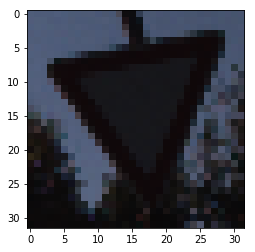

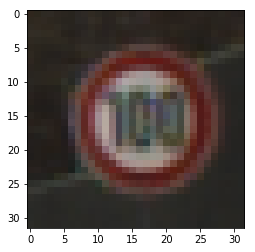

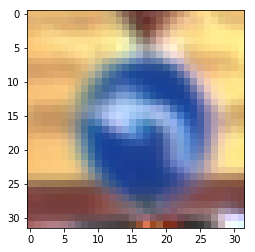

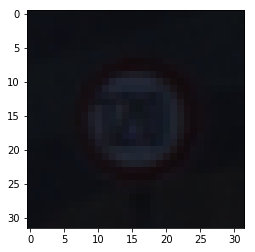

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display, Image
from tqdm import tqdm 
import tensorflow as tf

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

l=X_train.shape[0]
print ("l=",l)
for a in range(4):
    sample_idx = np.random.randint(l)  # pick a random image index
    sample_image = X_train[sample_idx]  # extract a 2D slice
    print ("label=",y_train[sample_idx])
    plt.figure()
    plt.imshow(sample_image)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
image_size = image_shape[0]
n_channels=image_shape[2]
num_labels = n_classes
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = int(n_train*0.85)
test_subset=2000

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -0.5
    b = 0.5
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size*n_channels)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

train_dataset_prenorm, train_labels = reformat(X_train,y_train)
test_dataset_prenorm,  test_labels  = reformat(X_test,y_test)

train_dataset=normalize(train_dataset_prenorm)
test_dataset =test_dataset_prenorm#normalize_greyscale(test_dataset_prenorm)


l= 12630
label= [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
nlabels= 43


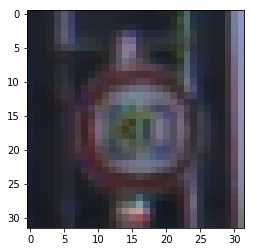

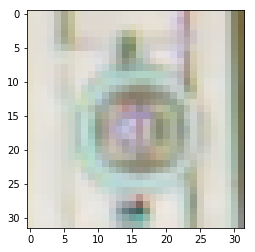

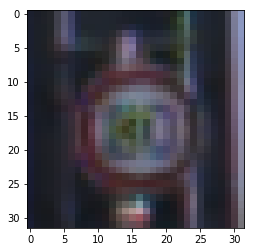

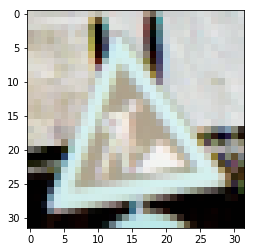

In [5]:

l=test_dataset.shape[0]
print ("l=",l)
for a in range(1):
    sample_idx = np.random.randint(l)  # pick a random image index
    sample_image_X = X_train[sample_idx]  # extract a 2D slice
    sample_image_test = test_dataset[sample_idx]  # extract a 2D slice
    sample_image = train_dataset[sample_idx]  # extract a 2D slice
    sample_image_prenorm = train_dataset_prenorm[sample_idx]  # extract a 2D slice
    print ("label=",train_labels[sample_idx])
    print("nlabels=",len(train_labels[sample_idx]))
    plt.figure()
    plt.imshow(sample_image_X)
    plt.figure()
    plt.imshow(sample_image_prenorm.reshape([32,32,3]))
    plt.figure()
    plt.imshow((sample_image.reshape([32,32,3])+0.5))
    plt.figure()
    plt.imshow(sample_image_test.reshape([32,32,3]))


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
I have used a simple preprocessing technique, just normalizing from -0.5 to 0.5. 

REVIEW: This approach gives the advantage of treat all dimensions as equals, since all values in all dimensions are in the same range. if that woudln't be the case, then a dimension would be more importan than others. Normalization usually is done by taking the mean and dividing by standard deviation, but on images since range is known, a common approasch is just substract divide by 255 and substract 0.5.

In [6]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
# Get randomized datasets for training and validation

train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(
    train_dataset,
    train_labels,
    test_size=0.09,
    random_state=832289)
#Get a subset of training data in order to work faster
train_dataset,train_labels=train_dataset[:train_subset,:],train_labels[:train_subset]

print('Training features and labels randomized and split.')
#valid_dataset, valid_labels = reformat(X_train[train_subset:train_subset+valid_subset,:],
#                                       y_train[train_subset:train_subset+valid_subset])
test_dataset , test_labels  = reformat(test_dataset[:test_subset,:],y_test[:test_subset])
test_dataset =normalize(test_dataset)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training features and labels randomized and split.
Training set (33327, 3072) (33327, 43)
Validation set (3529, 3072) (3529, 43)
Test set (2000, 3072) (2000, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I have a GPU with 2Gbytes and have some memory limitations.<br>
I can only use 85% of the training data and it is split in 33327 samples to traing and 3529 to validate. Just can use 2000 samples for test, with more data I got run out of memory error.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
batch_size = 128
learning_rate = 0.001
dropout=0.5

# Create some wrappers for simplicity
def lin(x,W,b):
    l=tf.add(tf.matmul(x,W),b)
    return l

def fc(x,W,b): 
    l=lin(x,W,b)
    fc=tf.nn.relu(l)
    return fc

def fc_drop(x,W,b,dropout):
    l=lin(x,W,b)
    fc=tf.nn.relu(l)
    fc=tf.nn.dropout(fc,dropout)
    return fc

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')
def conv2dmaxp(x,W,b,k=2):
    #if you do maxpoo don't do strides in conv
    cv=conv2d(x,W,b)
    mp=maxpool2d(cv,k)
    return mp
def conv2dmaxpdrop(x,W,b,k=2,dropout=0.5):
    #if you do maxpoo don't do strides in conv
    cv=conv2d(x,W,b)
    mp=maxpool2d(cv,k)
    return tf.nn.dropout(mp,dropout)

# Create model
def annX(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, image_size, image_size, n_channels])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    #conv2=x

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
def ann0(x, weights, biases, dropout):
    fc1=fc_drop(x,weights['wd1full'], biases['bd1'],dropout)
    out = lin(fc1, weights['out'], biases['out'])
    return out
def ann1(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, image_size, image_size, n_channels])
    conv1=conv2dmaxp(x    ,weights['wc1'],biases['bc1'])
    conv2=conv2dmaxp(conv1,weights['wc2'],biases['bc2'])
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    shape = conv2.get_shape().as_list()
    flat = tf.reshape(conv2, [-1, shape[1] * shape[2] * shape[3]])
    fc1 = fc_drop(flat,weights['wd1'], biases['bd1'],dropout)
    # Output, class prediction
    out = lin(fc1, weights['out'], biases['out'])
    return out
def ann(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, image_size, image_size, n_channels])
    conv1=conv2dmaxp(x    ,weights['wc1'],biases['bc1'])
    conv2=conv2dmaxpdrop(conv1,weights['wc2'],biases['bc2'])
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    shape = conv2.get_shape().as_list()
    flat = tf.reshape(conv2, [-1, shape[1] * shape[2] * shape[3]])
    fc1 = fc_drop(flat,weights['wd1'], biases['bd1'],dropout)
    fc2 = fc_drop(fc1 ,weights['wd2'], biases['bd2'],dropout)
    # Output, class prediction
    out = lin(fc2, weights['out'], biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.truncated_normal([5, 5, n_channels, 32], stddev=0.1)),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1)),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.truncated_normal([image_size//4*image_size//4*64, 512], stddev=0.1)),
    'wd2': tf.Variable(tf.truncated_normal([512, 256], stddev=0.1)),
    'wd1full': tf.Variable(tf.truncated_normal([image_size*image_size*n_channels, 1014], stddev=0.1)),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.truncated_normal([256, n_classes], stddev=0.1))
}

print("n_clases=", n_classes)

biases = {
    'bc1': tf.Variable(tf.zeros([32])),
    'bc2': tf.Variable(tf.constant(1.0,shape=[64])),
    'bd1': tf.Variable(tf.constant(1.0,shape=[512])),
    'bd2': tf.Variable(tf.constant(1.0,shape=[256])),
    'out': tf.Variable(tf.constant(1.0,shape=[n_classes]))
}

x = tf.placeholder(tf.float32)
l = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
# Feed dicts for training, validation, and test session
#train_feed_dict = {x: train_dataset, l: train_labels,keep_prob:dropout}
valid_feed_dict = {x: valid_dataset, l: valid_labels,keep_prob:1.0}
test_feed_dict =  {x: test_dataset , l: test_labels ,keep_prob:1.0}

# Training computation.
# tf Graph input
logits     = ann(x,weights,biases,keep_prob)
prediction = tf.nn.softmax(logits)
loss       = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, l))

# Evaluate model
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(l, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Optimizer.
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

  
# Predictions for the training, validation, and test data.
init = tf.initialize_all_variables()
# Test Cases
with tf.Session() as session:
    session.run(init)
    #session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)

n_clases= 43
Instructions for updating:
Use `tf.global_variables_initializer` instead.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**<BR>
I have definned some support functions:
- conv2dmaxp, a convolutional with maxpooling
- conv2dmaxpdrop, a convolutional with maxpooling and dropout
- fc_drop, a full connected with relu and dropout
- lin, just a linear layer

The layer used are:
- From input to 32 5x5 convolution with 2x2 maxpooling and not dropout<BR>
    conv1=conv2dmaxp(x    ,weights['wc1'],biases['bc1'])<BR>
- A convolution 64 5x5 convolution with 2x2 maxpooling and dropout 0.5<BR>
    conv2=conv2dmaxpdrop(conv1,weights['wc2'],biases['bc2'])<BR>
- Flatten the data<BR>
    flat = tf.reshape(conv2, [-1, shape[1] * shape[2] * shape[3]])<BR>
- Full connected 512 with relu and dropout 0.5<BR>
    fc1 = fc_drop(flat,weights['wd1'], biases['bd1'],dropout)<BR>
- Full connected 256 with relu and dropout 0.5<BR>
    fc2 = fc_drop(fc1 ,weights['wd2'], biases['bd2'],dropout)<BR>
- Linear 43 <BR>
    out = lin(fc2, weights['out'], biases['out'])<BR>



Epoch  2/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 0: 3.518262 val_accuracy=0.091527


Epoch  3/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 1: 3.038102 val_accuracy=0.206291


Epoch  4/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 2: 1.881702 val_accuracy=0.428450


Epoch  5/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 3: 1.382954 val_accuracy=0.535562


Epoch  6/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 4: 0.987904 val_accuracy=0.698215


Epoch  7/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 5: 0.641451 val_accuracy=0.807027


Epoch  8/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 6: 0.480900 val_accuracy=0.862851


Epoch  9/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 7: 0.424844 val_accuracy=0.888353


Epoch 10/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 8: 0.228789 val_accuracy=0.921224


Epoch 11/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 9: 0.264470 val_accuracy=0.933975


Epoch 12/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 10: 0.192997 val_accuracy=0.946727


Epoch 13/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 11: 0.153922 val_accuracy=0.951261


Epoch 14/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 12: 0.143337 val_accuracy=0.961179


Epoch 15/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 13: 0.101600 val_accuracy=0.960329


Epoch 16/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 14: 0.121237 val_accuracy=0.967980


Epoch 17/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 15: 0.070661 val_accuracy=0.968546


Epoch 18/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 16: 0.121336 val_accuracy=0.973080


Epoch 19/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 17: 0.038940 val_accuracy=0.970813


Epoch 20/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 18: 0.115406 val_accuracy=0.971947


Epoch 21/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 19: 0.048330 val_accuracy=0.952394


Epoch 22/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 20: 0.035968 val_accuracy=0.974214


Epoch 23/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 21: 0.053883 val_accuracy=0.981581


Epoch 24/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 22: 0.033233 val_accuracy=0.980731


Epoch 25/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 23: 0.058769 val_accuracy=0.981581


Epoch 26/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 24: 0.011243 val_accuracy=0.978181


Epoch 27/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 25: 0.057120 val_accuracy=0.986398


Epoch 28/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 26: 0.040145 val_accuracy=0.985265


Epoch 29/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 27: 0.033424 val_accuracy=0.986965


Epoch 30/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 28: 0.030559 val_accuracy=0.980731


Epoch 31/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 29: 0.018666 val_accuracy=0.984415


Epoch 32/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 30: 0.011938 val_accuracy=0.985832


Epoch 33/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 31: 0.051346 val_accuracy=0.985265


Epoch 34/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 32: 0.031145 val_accuracy=0.981581


Epoch 35/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 33: 0.020623 val_accuracy=0.980164


Epoch 36/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 34: 0.006976 val_accuracy=0.986115


Epoch 37/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 35: 0.029282 val_accuracy=0.990082


Epoch 38/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 36: 0.029987 val_accuracy=0.988099


Epoch 39/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 37: 0.011094 val_accuracy=0.986115


Epoch 40/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 38: 0.013349 val_accuracy=0.984131


Epoch 41/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 39: 0.003468 val_accuracy=0.988382


Epoch 42/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 40: 0.021435 val_accuracy=0.983281


Epoch 43/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 41: 0.008873 val_accuracy=0.983565


Epoch 44/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 42: 0.026093 val_accuracy=0.984131


Epoch 45/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 43: 0.013915 val_accuracy=0.984698


Epoch 46/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 44: 0.013466 val_accuracy=0.985832


Epoch 47/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 45: 0.001019 val_accuracy=0.987532


Epoch 48/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 46: 0.001303 val_accuracy=0.986965


Epoch 49/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 47: 0.016882 val_accuracy=0.986398


Epoch 50/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 48: 0.025383 val_accuracy=0.988099


Epoch 51/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 49: 0.050770 val_accuracy=0.986398


Epoch 52/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 50: 0.003133 val_accuracy=0.988099


Epoch 53/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 51: 0.064771 val_accuracy=0.988382


Epoch 54/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 52: 0.008544 val_accuracy=0.987815


Epoch 55/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 53: 0.001078 val_accuracy=0.988382


Epoch 56/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 54: 0.010081 val_accuracy=0.984131


Epoch 57/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 55: 0.038577 val_accuracy=0.990649


Epoch 58/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 56: 0.009794 val_accuracy=0.987815


Epoch 59/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 57: 0.007950 val_accuracy=0.981864


Epoch 60/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 58: 0.001975 val_accuracy=0.990082


Epoch 61/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 59: 0.000249 val_accuracy=0.986965


Epoch 62/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 60: 0.000148 val_accuracy=0.980731


Epoch 63/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 61: 0.003161 val_accuracy=0.988949


Epoch 64/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 62: 0.010960 val_accuracy=0.978464


Epoch 65/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 63: 0.010731 val_accuracy=0.989515


Epoch 66/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 64: 0.001611 val_accuracy=0.986398


Epoch 67/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 65: 0.023590 val_accuracy=0.986965


Epoch 68/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 66: 0.003311 val_accuracy=0.988099


Epoch 69/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 67: 0.000358 val_accuracy=0.991499


Epoch 70/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 68: 0.009456 val_accuracy=0.990082


Epoch 71/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 69: 0.000112 val_accuracy=0.982998


Epoch 72/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 70: 0.000878 val_accuracy=0.988949


Epoch 73/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 71: 0.023740 val_accuracy=0.986682


Epoch 74/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 72: 0.000414 val_accuracy=0.988382


Epoch 75/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 73: 0.020801 val_accuracy=0.987248


Epoch 76/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 74: 0.013780 val_accuracy=0.991782


Epoch 77/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 75: 0.015287 val_accuracy=0.987532


Epoch 78/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 76: 0.037745 val_accuracy=0.989515


Epoch 79/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 77: 0.002465 val_accuracy=0.965996


Epoch 80/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 78: 0.090378 val_accuracy=0.990082


Epoch 81/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 79: 0.006545 val_accuracy=0.988949


Epoch 82/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 80: 0.012582 val_accuracy=0.986115


Epoch 83/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 81: 0.045339 val_accuracy=0.992349


Epoch 84/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 82: 0.006966 val_accuracy=0.989799


Epoch 85/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 83: 0.006726 val_accuracy=0.990932


Epoch 86/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 84: 0.000423 val_accuracy=0.991782


Epoch 87/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 85: 0.034692 val_accuracy=0.988382


Epoch 88/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 86: 0.012386 val_accuracy=0.992632


Epoch 89/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 87: 0.003858 val_accuracy=0.991216


Epoch 90/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 88: 0.010453 val_accuracy=0.991499


Epoch 91/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 89: 0.003314 val_accuracy=0.987532


Epoch 92/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 90: 0.000457 val_accuracy=0.992066


Epoch 93/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 91: 0.002022 val_accuracy=0.986965


Epoch 94/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 92: 0.026676 val_accuracy=0.992916


Epoch 95/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 93: 0.002051 val_accuracy=0.989515


Epoch 96/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 94: 0.064734 val_accuracy=0.989515


Epoch 97/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 95: 0.000042 val_accuracy=0.993483


Epoch 98/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 96: 0.001183 val_accuracy=0.987532


Epoch 99/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 97: 0.002654 val_accuracy=0.990649


Epoch 100/100:   0%|          | 0/261 [00:00<?, ?batches/s]

Minibatch loss_val at epoch 98: 0.000644 val_accuracy=0.991782


Epoch 100/100: 100%|██████████| 261/261 [00:10<00:00, 25.72batches/s]


Minibatch loss_val at epoch 99: 0.000455 val_accuracy=0.991782
Model saved in file: model_epoch100.ckpt


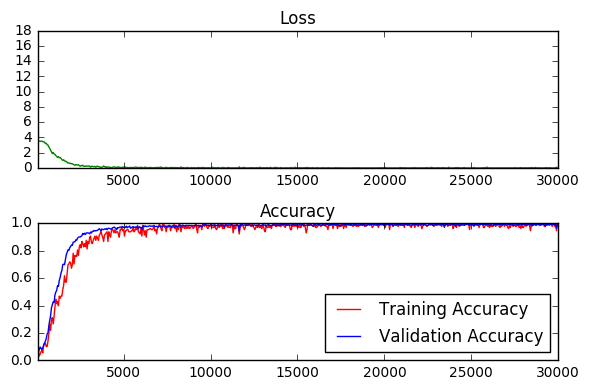

Validation accuracy at 0.9917823672294617
Test accuracy at 0.9480000734329224


In [97]:
### Train your model here.
### Feel free to use as many code cells as needed.

epochs = 100

# Gradient Descent
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

saver=tf.train.Saver()

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(train_subset/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_dataset[batch_start:batch_start + batch_size]
            batch_labels   = train_labels[batch_start:batch_start + batch_size]
            batch_feed_dict={x: batch_features,l: batch_labels,keep_prob:dropout}
            
            #print("batch_features.shape=",batch_features.shape)
            #print("batch_labels  .shape=",batch_labels[:10])

            # Run optimizer and get loss
            session.run(optimizer,feed_dict=batch_feed_dict)

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=batch_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
                loss_val=session.run(loss,feed_dict={x: batch_features,l: batch_labels,keep_prob:1.0})
                #print("Minibatch loss at step %d: %f" % (batch_i, loss_val))

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(loss_val)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
        print("Minibatch loss_val at epoch %d: %f val_accuracy=%f" % (epoch_i, loss_val,validation_accuracy))
    test_accuracy=session.run(accuracy,feed_dict=test_feed_dict)
    save_path=saver.save(session,"model_epoch100.ckpt")
    print("Model saved in file: %s"%save_path)
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))
print('Test accuracy at {}'.format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**<BR>
I have used:
- Adam optimizer with 0.001 learning rate.
- Batch sizes of 128
- 100 epochs and dropout 0.5
- 5x5x32 first conv
- 5x5x64 second conv
- 512 first full
- 256 second full


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**<br>
I started with ann0 which is a one layer neuron with dropouts.<BR>
After that I tryed with ann1 adding two conv layers.<BR>
Finally I added a full layer more.<BR>
I started with few epoch and since dropout regularization, as much epoch as better I have rise the epoch:<BR>
- 50  with 92.12% on test data.
- 100 with 94.80% on test data.
- 150 with 93.55% on test data.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import PIL.Image as pimg
#import os
#os.listdir(".")
with open("signnames.csv") as f:
    signames=f.readlines()
size=(32,32)
limg=[]
ly=[1,2,3,4,5,6,7]
names=["stop.jpg",
       "speedlimit30.jpg",
       "speedlimit60.jpg",
       "speedlimit100.jpg",
       "speedlimit120.jpg",
       "priorityroad.jpg",
       "dontturnleft.jpg",
       "forbident.jpg",
       "gostraightorright.jpg",
       "nopassing.jpg",
       "nopassingtrunk.jpg"]
for fn in names:
    im1=pimg.open(fn)
    im1=im1.resize(size, pimg.ANTIALIAS)
    im1=np.array(im1)
    plt.figure()
    plt.imshow(im1)
    limg.append(im1)
X_new=np.array(limg)
y_new=np.array(ly)
print(X_new.shape)
new_dataset_prenorm, new_labels = reformat(X_new,y_new)
#print("new_labels=",new_labels)
print("min,max=",np.min(new_dataset_prenorm),np.max(new_dataset_prenorm))
new_dataset=normalize(new_dataset_prenorm)
print("min,max=",np.min(new_dataset),np.max(new_dataset))
new_feed_dict={x:new_dataset,l:new_labels,keep_prob:1.0}

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**<BR>
Some images, mainly speedlimit, are oversized and are cropped to, and they are badly clasified. That is because in the dataset there is not this kind of images. On the other hand dontturnleft.jpg is not in the dataset.

In [1]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as session:
    session.run(init)
    saver.restore(session,"model_epoch100.ckpt")
    print("Model restored")
    pred=session.run(prediction,feed_dict=new_feed_dict)
    # Check accuracy against samples
    new_accuracy = session.run(accuracy, feed_dict=new_feed_dict)

print("pred=",np.max(pred,axis=1))
lnames=[]
print("pred=",np.argmax(pred,axis=1))
for i in np.argmax(pred,axis=1):
    print(i,signames[i+1])
    lnames.append(signames[i+1])
                       

NameError: name 'tf' is not defined

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**<BR>
It would do better if I chose pictures well cropped and not oversized, but overall I am happy with the result.

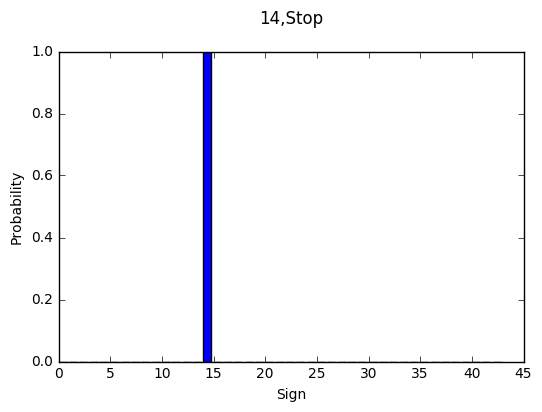

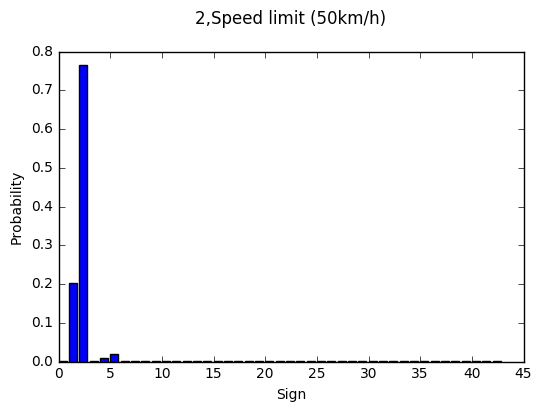

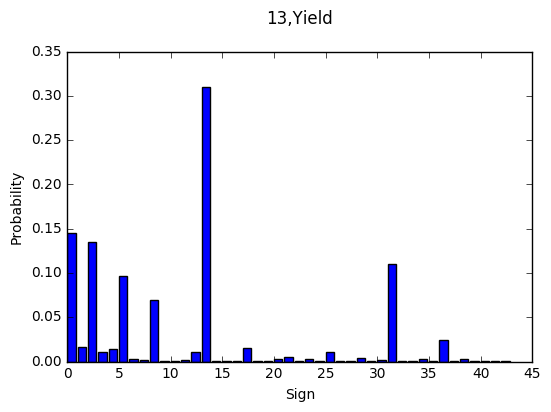

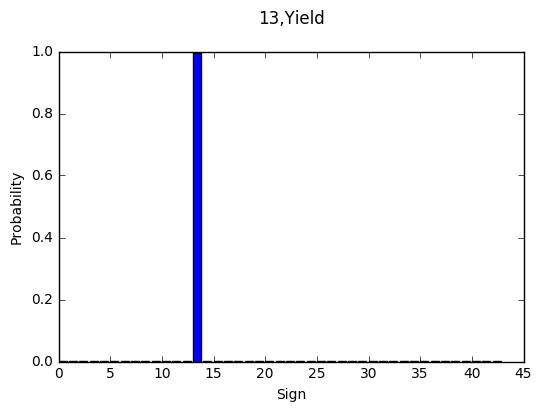

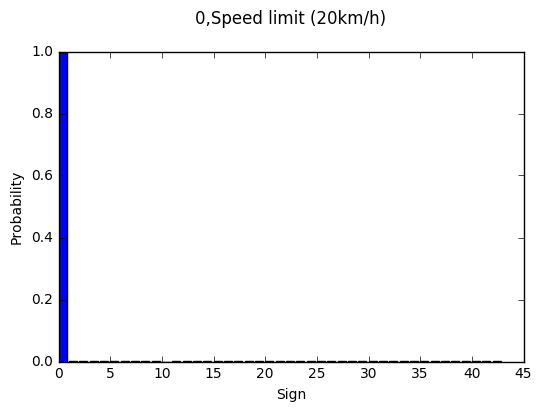

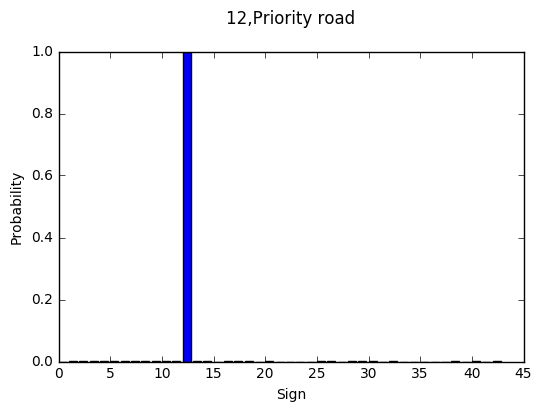

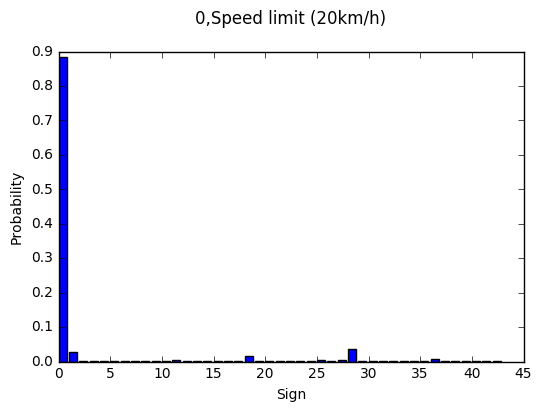

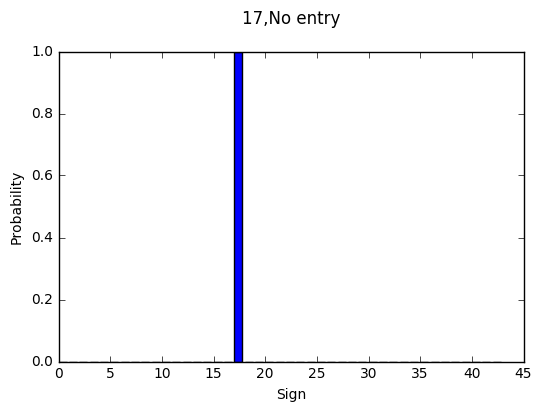

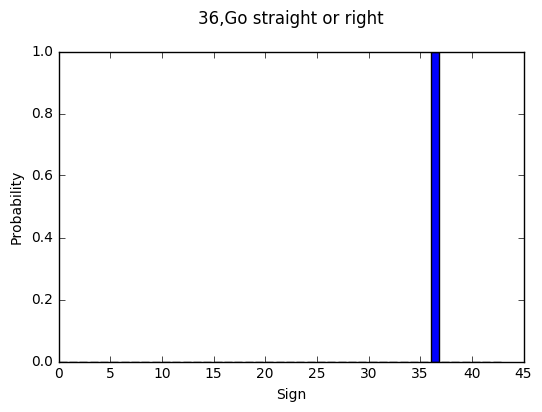

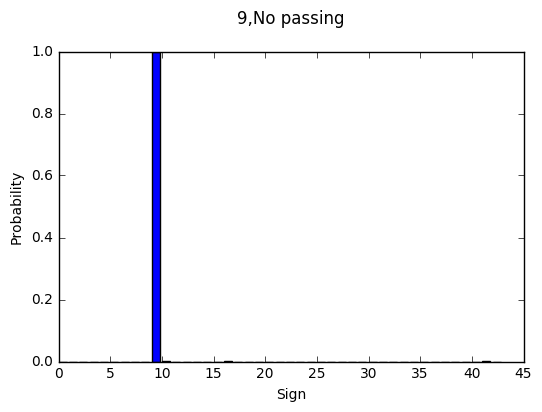

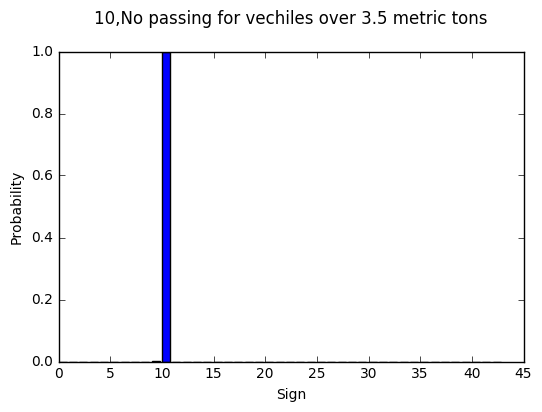

In [103]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
for i in range(pred.shape[0]):
    plt.figure(i)
    #print(pred[i])
    plt.bar(range(43),pred[i])
    plt.title(lnames[i])
    plt.xlabel("Sign")
    plt.ylabel("Probability")
    #plt.set_ylim([0, 1.0])
    #plt.set_xlim([0, 42])
    #plt.axis([0,42,0.0,1.0])
    plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**<BR>
On charts It can be seen that bad classified are more peaked histograms. That happend on the speedlimit images. <BR>
On the other hand the image that is not in the dataset dontturnleft.jpg has high confidence, since there is no more than one peak.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**<BR>
I would need a traffic sign detector, then crop the roi, load the model and predict the result.<BR>
In Dlib C++ library there is a detector using  max-margin object-detection algorithm (MMOD) in combination with deep learning, and it works very well and fast, with only a few training data. This is the URL with more details:
- http://blog.dlib.net/

I would like to use it in my guide robot in order to detect pedestrian and dinamic object in the university campus.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.